# Why is Logistic Regression Called Linear Method?

Let's start with the linear regression, the most basic tool of statistical learning.

### Cautions

* For brevity, everything here is assumed to be in 1D.
* Mathematical and implementational details are not dicussed here, while basic implementations are provided anyway.  
  Please consult with textbooks or Google.
* The main reference of this notebook is "The Elements of Statictical Learning" (ESL) 2E by Hastie et al.

In [1]:
%matplotlib inline
import scipy
import matplotlib.pyplot as plt

### Linear Regression

It seeks the best straight line to explain the data.

In other words, linear regression is like -- I am looking at the scatterplot, holding a big ruler, and I simply draws a straight line intuitively suitable for the data.

\begin{equation}
Y = f(X) = \beta_0 + \beta_1X
\end{equation}

The solution -- or the estimate of -- $(\beta_0, \beta_1)$ of the above problem will be more or less similar with my straight line.

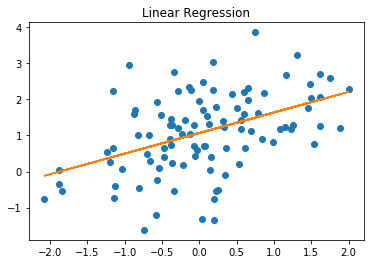

In [2]:
"""Typical example for 1D linear regression"""
# Generate data
sample_gaussian = scipy.random.multivariate_normal(
    mean=(0, 1),
    cov=((1, .5), (.5, 1)),
    size=100,
)
sample_x = sample_gaussian[:, 0]
sample_y = sample_gaussian[:, 1]

# Plot the data
fig0 = plt.figure(0)
ax00 = fig0.add_subplot(1, 1, 1)
ax00.plot(sample_x, sample_y, 'o')

# Center the data
mean_y = sample_y.mean()
sample_y_centered = sample_y - mean_y

# Linear Regression for 1D
hat_beta = sample_y_centered.dot(sample_x) / (sample_x*sample_x).sum()
hat_y = mean_y + hat_beta*sample_x

# Plot the fit
ax00.set_title('Linear Regression')
ax00.plot(sample_x, hat_y)
plt.show()

### Linear Regression for Classification

The response variable becomes discrete and the "classification problem" pursuits an answer: Where this item belongs.

\begin{equation}
Y = f(X) = \beta_0 + \beta_1X \\
\text{where } Y \in \{0,1\}
\end{equation}

But the linear regression doesn't care much anyway.

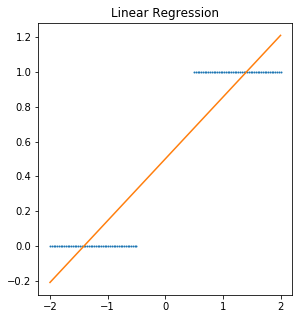

In [3]:
"""1D linear regression for 0-1 responses"""
sample_x = scipy.concatenate((scipy.linspace(-2, -.5, 50),
                              scipy.linspace(.5, 2, 50)))
sample_y = scipy.concatenate((scipy.zeros(50), scipy.ones(50)))

fig1 = plt.figure(1, figsize=(10, 5))
ax11 = fig1.add_subplot(1, 2, 1)
ax11.plot(sample_x, sample_y, 'o', markersize=1)

# Center the data
mean_y = sample_y.mean()
sample_y_centered = sample_y - mean_y

# Linear Regression for 1D
hat_beta = sample_y_centered.dot(sample_x) / (sample_x*sample_x).sum()
hat_y = mean_y + hat_beta*sample_x

# Plot the fit
ax11.set_title('Linear Regression')
ax11.plot(sample_x[[0, -1]], hat_y[[0, -1]])
plt.show()

### What if $Y$ is of 3 classes (or more)?

One of the popular choices is to bring the indicator (or dummy) variables $(Y_1, Y_2, Y_3)$ instead of $Y$. Then we can equivalently represent $Y$ as

\begin{align}
Y = 0 &\Rightarrow (Y_1, Y_2, Y_3) = (1,0,0) \\
Y = 1 &\Rightarrow (Y_1, Y_2, Y_3) = (0,1,0) \\
Y = 2 &\Rightarrow (Y_1, Y_2, Y_3) = (0,0,1)
\end{align}

If the linear regression applies to each of $Y_i$ separately, we get 3 fitted values and it is a natural decision to take the highest value as our answer.

### Does it seems good? Why if not?

Using the indicator variables, we may intuitively consider the fitted values as the score, or the possibility, to belong to some group. Theoretically it is also true.

> With an indicator variable $Y_k$,
>
> \begin{equation}
\text{regression function} = \text{conditional expectation} = \text{posterior probability}
\end{equation}
>
> \begin{equation}
f(x) = \text{E}(Y_k|X=x) = \text{Pr}(G=k|X=x)
\end{equation}

But our fitted values that the linear regression provided do not seem suitable as probabilities. So here comes the better approaches like linear discriminant analysis (LDA) and logistic regression (LDA not covered here).

In a nutshell, logistic regression tries to make the regression function satisfy the properties of probability.

### Logit transform

\begin{equation}
\text{logit}: (0,1) \mapsto \mathbb{R} \\
\text{logit}(p) = \log\frac{p}{1-p}
\end{equation}

It is monotone and continuous, so is its inverse (called logistic function).

\begin{equation}
\text{logistic}: \mathbb{R} \mapsto (0,1) \\
\text{logistic}(a) = \frac1{1+\exp(-a)} = \frac{\exp(a)}{\exp(a)+1}
\end{equation}

Therefore it seems pretty good for converting the real number to the probability.

In [4]:
def logit(p:scipy.ndarray)->scipy.ndarray:
    return scipy.log(p/(1-p))


def logistic(a:scipy.ndarray)->scipy.ndarray:
    return scipy.reciprocal(1+scipy.exp(-a))

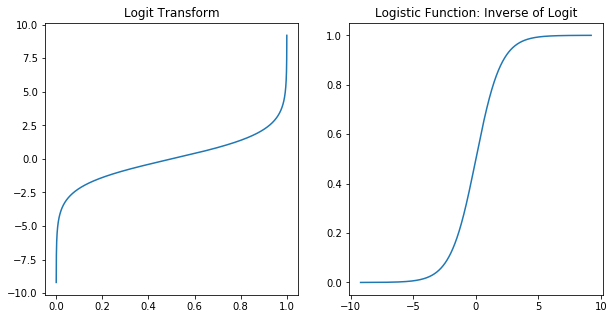

In [9]:
xgrid1 = scipy.linspace(0, 1, 10000, endpoint=False)[1:]
y_logitx = logit(xgrid1)

xgrid2 = y_logitx
y_logisticx = logistic(xgrid2)

fig2 = plt.figure(2, figsize=(10, 5))
ax21 = fig2.add_subplot(1, 2, 1)
ax21.plot(xgrid1, y_logitx)
ax21.set_title('Logit Transform')

ax22 = fig2.add_subplot(1, 2, 2)
ax22.plot(xgrid2, y_logisticx)
ax22.set_title('Logistic Function: Inverse of Logit')
plt.show()

### Logistic Regression

Using indicator variables, what we have done is

\begin{align}
\text{Pr}(G=1|X=x) &= \beta_{10} + \beta_{11} x \\
\text{Pr}(G=2|X=x) &= \beta_{20} + \beta_{21} x \\
&\vdots \\
\text{Pr}(G=K|X=x) &= \beta_{K0} + \beta_{K1} x \\
\end{align}

But if we want more probability-like estimates, the monotone transformation comes to action:

\begin{align}
\text{logit } \text{Pr}(G=1|X=x) &= \beta_{10} + \beta_{11} x \\
\text{logit } \text{Pr}(G=2|X=x) &= \beta_{20} + \beta_{21} x \\
&\vdots \\
\text{logit } \text{Pr}(G=K-1|X=x) &= \beta_{(K-1)0} + \beta_{(K-1)1} x
\\
\text{Pr}(G=K|X=x) &= 1- \sum_{k=1}^{K-1}\text{Pr}(G=k|X=x)
\end{align}

where we arrive at the formulation of logistic regression.

In [6]:
"""Logistic regression

Please check any textbook for the detail of the algorithm
(I refer to the page 121 of ESL, Section 4.4)."""
import scipy.linalg

def fvec_p(mat_x:scipy.ndarray, vec_beta:scipy.ndarray)->scipy.ndarray:
    """Compute the vector p, the vector of fitted probabilties"""
    num = scipy.exp(mat_x@vec_beta)
    return num/(num+1)


def fdiag_W(mat_x:scipy.ndarray, vec_beta:scipy.ndarray)->scipy.ndarray:
    """Compute the diagonal element of W"""
    vec_p = fvec_p(mat_x, vec_beta)
    return vec_p*(1-vec_p)

In [7]:
# Add a constant variable
size_beta = 2
sample_1x = scipy.vstack((scipy.ones_like(sample_x), sample_x)).T

# initialization for iteration
hat_beta_old = scipy.zeros(size_beta)
beta_increment = scipy.ones(size_beta)

# Newton-Raphson iteration
while (beta_increment*beta_increment).sum() > 1e-8:
    vec_p = fvec_p(sample_1x, hat_beta_old)
    gradient = sample_1x.T @ (sample_y-vec_p)
    hessian = sample_1x.T @ scipy.diag(fdiag_W(sample_1x, hat_beta_old)) @ sample_1x

    try:
        beta_increment = scipy.linalg.solve(hessian, gradient)
    except scipy.linalg.LinAlgError:
        break
    
    hat_beta_new = hat_beta_old + beta_increment
    hat_beta_old = hat_beta_new.copy()

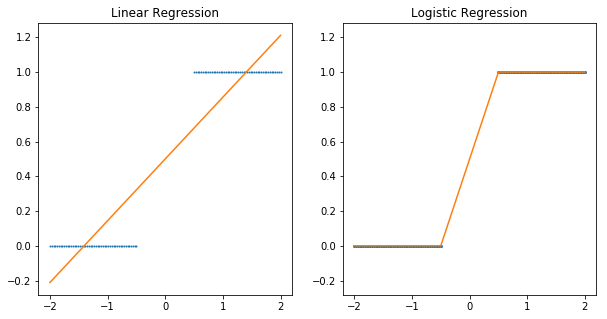

In [8]:
# Plot and compare
ax12 = fig1.add_subplot(1, 2, 2)
ax12.plot(sample_x, sample_y, 'o', markersize=2)

ax12.plot(sample_x, logistic(sample_1x @ hat_beta_new))
ax12.set_ylim(ax11.get_ylim())
ax12.set_title('Logistic Regression')
fig1

Logistic regression seems to preserve the decision rule (or decision boundary) as linear one, which looks definitely better.

### Justification of taking the monotone transform

A monotone transform does not affect the order of the original input values.

Therefore, because -- when using the indicator variables -- we take the maximum fitted value as the estimate, the logit transform doesn't do any harm.

### Improvement of taking the monotone transform

Logistic regression makes the same decision as the linear regression with indicator variables. What's the difference then?

1. Logistic regression keeps the decision boundary linear as the linear regression does.
2. Moreover it makes the solution more sensible when testing, or real application.

Consider we fit the linear regression model with indicator variables. Then we should test the model. What if the test point is outside range (or convex hull) of the training data? 

> This is a consequence of the rigid nature of linear regression, especially if we make predictions outside the hull of the training data. These violation (of probabilistic properties) in themselves does not guarantee that this approach will not work. (page 104 of ESL, $\S$ 4.2)
>
> The logistic regression model arises from the desire to model the posterior probabilities of the $K$ classes via linear functions in $x$, while at the same time ensuring that they sum to one and remain in $[0,1]$.
> (page 119 of ESL, $\S$ 4.4)



### So, is the solution linear?

As you may see the actual implementation of logistic regression, it usually requires MLE with the multinomial distribution and the solution is not even the closed-form so we solve it via an iterative procedure.

Therefore the logistic regression is called linear method because the decision boundary it provides is linear, not because we can get its estimates by solving a linear equation.

End of the story.